# DATA MUNGING

In [116]:
import pandas as pd
import os


In [117]:
raw_data_path  = os.path.join(os.pardir, "data","raw")

train_csv_path = os.path.join(raw_data_path, "train.csv")
test_csv_path = os.path.join(raw_data_path, "test.csv")

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [118]:
train_df.shape

(891, 12)

In [119]:
test_df.shape

(418, 11)

In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [121]:
test_df['Survived']= -888

In [122]:
test_df.shape

(418, 12)

In [123]:
## merge test and train

df = pd.concat((train_df, test_df), axis=0, sort=True)

In [124]:
df.shape

(1309, 12)

#### Identify columns having   null 

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 107.4+ KB


### Embark column

In [126]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [127]:
### Check for survival

pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [128]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [129]:
### check for the fare

df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [130]:
## Set the values for  null in EMbark column

df.Embarked.fillna('C', inplace=True)

In [131]:
# Check for null
df.Embarked.isnull().values.any()

False

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 107.4+ KB


### Fare column

In [133]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-888,3701


In [134]:
df.groupby(["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [135]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [136]:
df.Fare.fillna(median_fare, inplace=True)

In [137]:
df.Fare.isnull().values.any()

False

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 107.4+ KB


### Age column

In [139]:
df[df.Age.isnull()].head(15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1,330959
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0,349216
31,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1,PC 17569
32,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1,335677
36,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1,2677
42,NaN,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0,349253


In [140]:
### taking mean

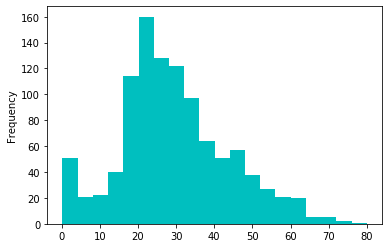

In [141]:
%matplotlib inline
df.Age.plot(kind="hist", bins=20, color='c')

### option 1 :Use mean age

In [142]:
df.Age.mean()

29.881137667304014

In [143]:
### mean has extreem values

### option 2 :Use median age by sex

In [144]:
df.groupby("Sex").Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

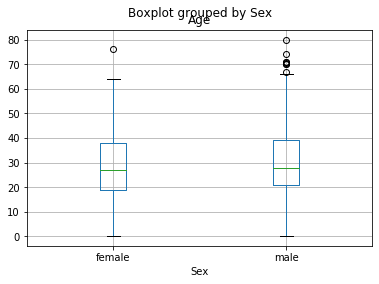

In [145]:
## box plot

df[df.Age.notnull()].boxplot('Age', 'Sex')

In [146]:

age_by_sex = df.groupby(["Sex"]).Age.transform('median')

#Replace code
#df.Age.fillna(age_by_sex, inplace = True)

### option 3 : replace age by median age of Pclass

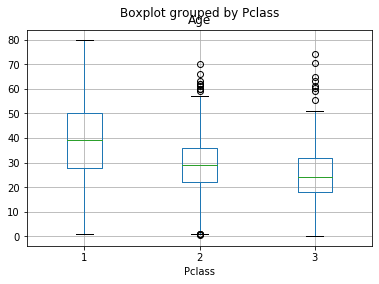

In [147]:
df[df.Age.notnull()].boxplot("Age","Pclass")

In [148]:
age_by_pclass = df.groupby("Pclass").Age.transform('median')

#Replace
#df.Age.fillna(age_by_pclass, inplace=True )

### option 4 : replace age by median age of Name Tittle (e.g. mr, miss)

In [149]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [150]:
def getNameTitle(name):
    title_group = {'mr' : 'Mr',
                  'mrs' : 'Mrs',
                 'miss' : 'Miss',
                 'master' : 'Master',
                 'don' : 'Sir',
                  'rev' : 'Sir',
                  'dr' : 'Officer',
                  'mme' : 'Mrs',
                  'ms' : 'Mrs',
                  'major' : 'Officer',
                  'lady' : 'Lady',
                  'sir' : 'Sir',
                  'mlle' : 'Miss',
                  'col' : 'Officer',
                  'capt' : 'Officer',
                  'the countess' : 'Lady',
                  'jonkheer' : 'Sir',
                  'dona' : 'Lady'
                    }
    name_su = name.split(',')[1]
    name_t = name_su.split('.')[0]
    title = name_t.strip().lower()
    return title_group[title]

In [151]:

df.Name.map(lambda x : getNameTitle(x)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [152]:
df['Title'] = df.Name.map(lambda x : getNameTitle(x))

In [153]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


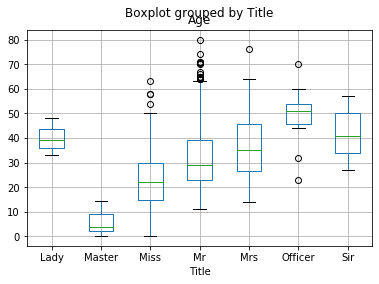

In [154]:
df[df.Age.notnull()].boxplot("Age", "Title")

In [155]:
age_by_title = df.groupby("Title").Age.transform('median')
df.Age.fillna(age_by_title, inplace=True)

In [156]:
df.Age.isnull().values.any()

False

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 112.5+ KB


# Detection and Treat Outliers

### Age Column

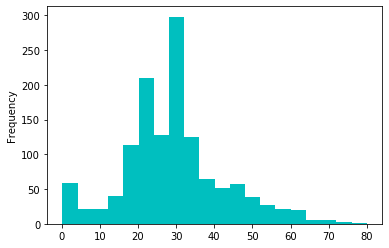

In [158]:
## Histogram
df.Age.plot(kind="hist", bins=20, color='c')

In [159]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
96,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,97,1,male,0,0,PC 17754,Mr
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0,370369,Mr
493,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,494,1,male,0,0,PC 17609,Mr
630,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,631,1,male,0,1,27042,Mr
851,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0,347060,Mr
96,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,988,1,female,1,-888,19877,Mrs


### FARE Column

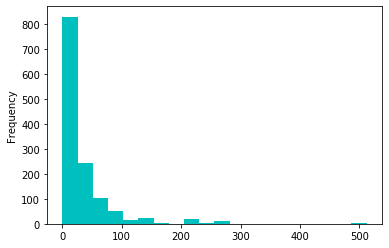

In [160]:
#Histogram to understand oulier

df.Fare.plot(kind="hist", bins=20,color='c')

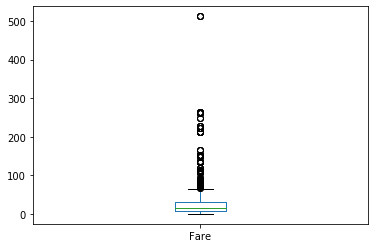

In [161]:
#box plot to identify fare

df.Fare.plot(kind='box')

In [162]:
#look in to the ouliers

df[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1,PC 17755,Miss
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1,PC 17755,Mr
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1,PC 17755,Mr
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,-888,PC 17755,Mrs


### Transformation 

In [163]:
## find log
import numpy as np

LogFare = np.log(df.Fare + 1.0) ## log(0) is undefined that we adding 1

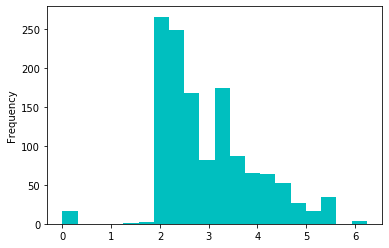

In [164]:
## Histogram
LogFare.plot(kind='hist', bins=20, color='c')

### BINNiNG

In [165]:
### qcut

pd.qcut(df.Fare, 4)

0        (-0.001, 7.896]
1      (31.275, 512.329]
2        (7.896, 14.454]
3      (31.275, 512.329]
4        (7.896, 14.454]
5        (7.896, 14.454]
6      (31.275, 512.329]
7       (14.454, 31.275]
8        (7.896, 14.454]
9       (14.454, 31.275]
10      (14.454, 31.275]
11      (14.454, 31.275]
12       (7.896, 14.454]
13      (14.454, 31.275]
14       (-0.001, 7.896]
15      (14.454, 31.275]
16      (14.454, 31.275]
17       (7.896, 14.454]
18      (14.454, 31.275]
19       (-0.001, 7.896]
20      (14.454, 31.275]
21       (7.896, 14.454]
22       (7.896, 14.454]
23     (31.275, 512.329]
24      (14.454, 31.275]
25     (31.275, 512.329]
26       (-0.001, 7.896]
27     (31.275, 512.329]
28       (-0.001, 7.896]
29       (-0.001, 7.896]
             ...        
388      (-0.001, 7.896]
389     (14.454, 31.275]
390    (31.275, 512.329]
391    (31.275, 512.329]
392     (14.454, 31.275]
393      (7.896, 14.454]
394     (14.454, 31.275]
395    (31.275, 512.329]
396      (-0.001, 7.896]


In [166]:
## label the bins

pd.qcut(df.Fare, 4 , labels= ["very_low",'low','high','very_high'])

0       very_low
1      very_high
2            low
3      very_high
4            low
5            low
6      very_high
7           high
8            low
9           high
10          high
11          high
12           low
13          high
14      very_low
15          high
16          high
17           low
18          high
19      very_low
20          high
21           low
22           low
23     very_high
24          high
25     very_high
26      very_low
27     very_high
28      very_low
29      very_low
         ...    
388     very_low
389         high
390    very_high
391    very_high
392         high
393          low
394         high
395    very_high
396     very_low
397    very_high
398     very_low
399     very_low
400    very_high
401         high
402    very_high
403    very_high
404         high
405          low
406          low
407    very_high
408     very_low
409          low
410     very_low
411    very_high
412     very_low
413          low
414    very_high
415     very_l

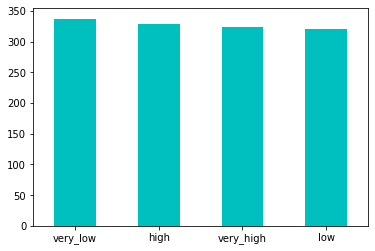

In [167]:
### Bar diagram
pd.qcut(df.Fare, 4, labels = ["very_low",'low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0)

In [168]:
### Add new column fro bins

df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels = ["very_low",'low','high','very_high'])

In [169]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,very_low
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,very_high
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,low
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,very_high
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,low


# Feature Engineering

### create feature

#### Feature: Age State

In [170]:
df['AgeState'] = np.where(df.Age >= 18, 'Adult', 'Child')

In [171]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [172]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Feature: FamilySize

In [173]:
### create new family size feature
df['FamilySize'] = df.Parch+ df.SibSp + 1 ### 1 for self

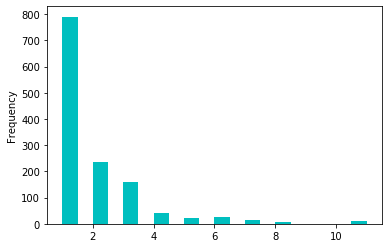

In [174]:
df.FamilySize.plot(kind='hist', bins=20, color='c')

In [175]:
df.loc[df.FamilySize == df.FamilySize.max(), ['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
159,"Sage, Master. Thomas Henry",0,11,CA. 2343
180,"Sage, Miss. Constance Gladys",0,11,CA. 2343
201,"Sage, Mr. Frederick",0,11,CA. 2343
324,"Sage, Mr. George John Jr",0,11,CA. 2343
792,"Sage, Miss. Stella Anna",0,11,CA. 2343
846,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
863,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
188,"Sage, Miss. Ada",-888,11,CA. 2343
342,"Sage, Mr. John George",-888,11,CA. 2343
360,"Sage, Master. William Henry",-888,11,CA. 2343


In [176]:
### check the survival rate for Family Size

pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Featur : Mother

In [177]:
df['IsMother'] = np.where((df.Sex == 'female') & (df.Age > 18) & (df.Parch > 0) & (df.Title != 'Miss'), 1, 0)

In [178]:
### check the survival rate

pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Feature : Deck
#### Deck is created from first char of the Cabin column

In [179]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [180]:
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [181]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN ## set T to NaN since only passnger is there

In [182]:
### Create new column deck
def getDeckNameFromCabin(Cabin):
    return np.where(pd.notnull(Cabin), str(Cabin)[0].upper(),'Z')

df['Deck'] = df.Cabin.map(lambda x : getDeckNameFromCabin(x))


In [183]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [184]:
## Survival rate based on deck

pd.crosstab(df[df.Survived !=-888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [185]:
##Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age            1309 non-null float64
Cabin          294 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
Fare_Bin       1309 non-null category
AgeState       1309 non-null object
FamilySize     1309 non-null int64
IsMother       1309 non-null int32
Deck           1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(6), object(8)
memory usage: 139.4+ KB


# Categorical Feature Encoding 

In [186]:
df['IsMale'] = np.where(df.Sex == 'male' , 1, 0)

In [187]:
df.IsMale.value_counts()

1    843
0    466
Name: IsMale, dtype: int64

In [188]:
## one-hot encoding

df = pd.get_dummies(df, columns=["Embarked",'Pclass', 'Fare_Bin', 'Title', 'AgeState','Deck'])

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 40 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Fare_Bin_very_low     1309 non-null uint8
Fare_Bin_low          1309 non-null uint8
Fare_

### Drop colums

In [ ]:
df.drop(["Cabin",'Sex','Ticket','Parch','SibSp','Name'], axis = 1, inplace=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 35 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Name                  1309 non-null object
PassengerId           1309 non-null int64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Fare_Bin_very_low     1309 non-null uint8
Fare_Bin_low          1309 non-null uint8
Fare_Bin_high         1309 non-null uint8
Fare_Bin_very_high    1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_M

In [193]:
df.drop(['Name'], axis = 1, inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 34 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
PassengerId           1309 non-null int64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Fare_Bin_very_low     1309 non-null uint8
Fare_Bin_low          1309 non-null uint8
Fare_Bin_high         1309 non-null uint8
Fare_Bin_very_high    1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_Mr

# Save data frame to file

In [195]:
## Paths

processed_data_path = os.path.join(os.path.pardir, "data", "processed")
train_path = os.path.join(processed_data_path, 'train.csv')
test_path = os.path.join(processed_data_path, "test.csv")

In [201]:
## write train csv

df.loc[df.Survived != -888].to_csv(train_path)

### write csv to test without Srvived column

columns = [ c  for c in df.columns if c != 'Survived']

df.loc[df.Survived == -888, columns].to_csv(test_path)

In [204]:
np.nan

nan

## Write entire code into py file 

In [202]:
get_processed_data_script_file = os.path.join(os.path.pardir, "src",'data','get_processed_data.py')

In [260]:
%%writefile $get_processed_data_script_file

import pandas as pd
import numpy as np
import os

def read_data():
    raw_data_path = os.path.join(os.path.pardir, 'data','raw')
    test_file_path = os.path.join(raw_data_path, "test.csv")
    train_file_path = os.path.join(raw_data_path, "train.csv")    
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')   
    test_df['Survived'] = -888    
    df = pd.concat((train_df, test_df), axis =0, sort=True)
    return df   

def get_title(name):
    title_group = {'mr' : 'Mr',
                  'mrs' : 'Mrs',
                 'miss' : 'Miss',
                 'master' : 'Master',
                 'don' : 'Sir',
                  'rev' : 'Sir',
                  'dr' : 'Officer',
                  'mme' : 'Mrs',
                  'ms' : 'Mrs',
                  'major' : 'Officer',
                  'lady' : 'Lady',
                  'sir' : 'Sir',
                  'mlle' : 'Miss',
                  'col' : 'Officer',
                  'capt' : 'Officer',
                  'the countess' : 'Lady',
                  'jonkheer' : 'Sir',
                  'dona' : 'Lady'
                    }
    name_su = name.split(',')[1]
    name_t = name_su.split('.')[0]
    title = name_t.strip().lower()
    return title_group[title]

def fill_missing_values(df):
    df.Embarked.fillna('C', inplace=True)    
    median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    age_by_title = df.groupby('Title').Age.transform('median')
    df.Age.fillna(age_by_title, inplace=True)
    return df
    
def get_deck(Cabin):
    return np.where(pd.notnull(Cabin), str(Cabin)[0].upper(),'Z')

def write_data(df):
    processed_data_path = os.path.join(os.path.pardir, "data", "processed")
    train_path = os.path.join(processed_data_path, 'train.csv')
    test_path = os.path.join(processed_data_path, "test.csv")
    ## write train csv
    df.loc[df.Survived != -888].to_csv(train_path)
    ### write csv to test without Srvived column
    columns = [ c  for c in df.columns if c != 'Survived']
    df.loc[df.Survived == -888, columns].to_csv(test_path)
    
def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )
            
            
def reorder_columns(df):
    columns = [c for c in df.columns if c!= 'Survived' ]
    columns = ['Survived'] + columns
    df = df[columns]
    return df


if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df) 


Overwriting ..\src\data\get_processed_data.py


In [261]:
!python $get_processed_data_script_file

In [262]:
processed_data_path = os.path.join(os.path.pardir, "data", "processed")
train_path = os.path.join(processed_data_path, 'train.csv')
test_path = os.path.join(processed_data_path, "test.csv")
train_df = pd.read_csv(train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [263]:
test_df = pd.read_csv(test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-